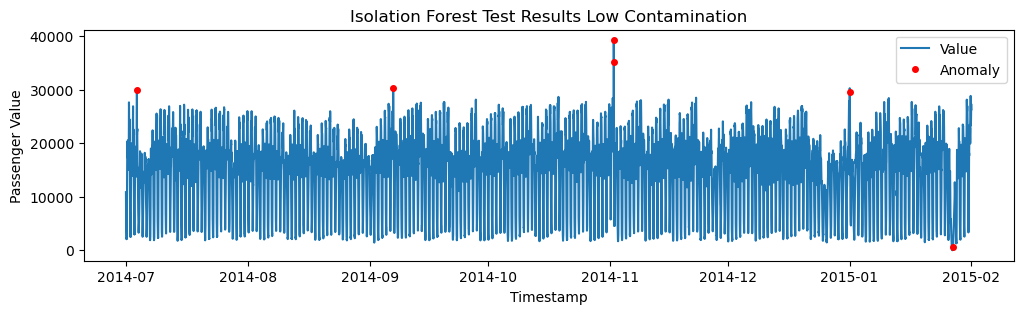

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score

data = pd.read_csv("nyc_taxi.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'])


isolation_forest = IsolationForest(n_estimators=500, contamination=0.0005, max_features = 0.8, max_samples = 0.9)
isolation_forest.fit(data[['value']].values.reshape(-1, 1))


anomaly_scores = isolation_forest.decision_function(data[['value']].values.reshape(-1, 1))
data['anomaly_score'] = anomaly_scores
data['anomaly'] = isolation_forest.predict(data[['value']].values.reshape(-1, 1))

plt.figure(figsize=(12, 3))
plt.plot(data['timestamp'], data['value'], label='Value')
plt.plot(data[data['anomaly'] == -1]['timestamp'], data[data['anomaly'] == -1]['value'], 'ro', markersize=4, label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Passenger Value')
plt.title('Isolation Forest Test Results Low Contamination')
plt.legend()
plt.show()